In [1]:
!pip install ase

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 63.3 MB/s eta 0:00:00


In [1]:
!pip install mace-torch

In [2]:
!git clone https://github.com/modrzejewski/mbe-automation.git

Cloning into 'mbe-automation'...
remote: Enumerating objects: 3426, done.
remote: Counting objects: 100% (452/452), done.
remote: Compressing objects: 100% (290/290), done.
remote: Total 3426 (delta 163), reused 316 (delta 157), pack-reused 2974 (from 1)
Receiving objects: 100% (3426/3426), 805.00 KiB | 3.31 MiB/s, done.
Resolving deltas: 100% (1868/1868), done.


In [3]:
!pip install torch torch_geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 63.7 MB/s eta 0:00:00


In [8]:
import torch
from ase.io import read
import os
import numpy as np
# Importuj własne klasy i funkcje z modułów
from mace.calculators import MACECalculator
from MD import simpleMD

In [9]:
import torch
torch.cuda.is_available()

True

Używane urządzenie: cuda
Inicjalizacja kalkulatora dla MACE-OFF...
Using head Default out of ['Default']
No dtype selected, switching to float64 to match model dtype.
Uruchamianie symulacji MD na 1000 kroków...


/usr/local/lib/python3.12/dist-packages/mace/calculators/mace.py:197: UserWarning: Environment variable TORCH_FORCE_NO_WEIGHTS_ONLY_LOAD detected, since the`weights_only` argument was not explicitly passed to `torch.load`, forcing weights_only=False.
  torch.load(f=model_path, map_location=device)


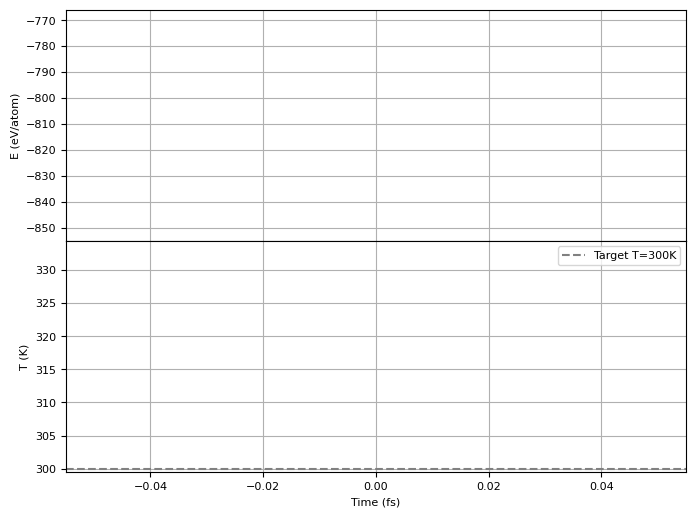

MD zakończone w 3.41 minut!

Symulacja zakończona. Trajektoria została zapisana w pliku: 'mace_off_trajectory.xyz'


In [10]:
if __name__ == '__main__':
    MACE_OFF_MODEL_PATH = 'MACE-OFF24_medium.model'

    # Parametry symulacji
    TEMPERATURE = 300  # Kelwiny
    STEPS_INTERVAL = 10 # Zapisuj klatkę co 10 kroków
    TOTAL_STEPS = 1000  # Całkowita liczba kroków MD
    OUTPUT_TRAJECTORY = 'mace_off_trajectory.xyz'

    device = "cuda" if torch.cuda.is_available() else "cpu"
    print(f"Używane urządzenie: {device}")

    if not os.path.exists(MACE_OFF_MODEL_PATH):
        raise FileNotFoundError(
            f"Nie znaleziono modelu MACE-OFF w ścieżce: '{MACE_OFF_MODEL_PATH}'. "
            "Pobierz model i/lub zaktualizuj ścieżkę w skrypcie."
        )

    print("Inicjalizacja kalkulatora dla MACE-OFF...")
    calculator = MACECalculator(model_path=MACE_OFF_MODEL_PATH, device=device)


    initial_structure = read('/content/mbe-automation/Systems/X23/08_cyanamide/solid.xyz')
    size=3
    P = size*np.identity(3)
    simpleMD(
        init_conf=initial_structure,
        temp=TEMPERATURE,
        calc=calculator,
        fname=OUTPUT_TRAJECTORY,
        s=STEPS_INTERVAL,
        T=TOTAL_STEPS
    )

    print(f"\nSymulacja zakończona. Trajektoria została zapisana w pliku: '{OUTPUT_TRAJECTORY}'")


